In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from IPython.display import clear_output
import time

/home/devesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/devesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/devesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/devesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

1.14.0


In [90]:
''' 

                                 ##### Make_Dataset #####

@args : None
@Returns (Features and Labels) of dimensions specified in next cell

Features : X Y Z axis concatenated together

Labels : Speed of each sample

Inputs : 1) Frame Size : size of the sliding window
         2) Overlap Percentage : percentage of overlap desired in each sliding frame
        
In function variables : 1) instances : Total no of frames that can be achieved
                        2) start_index : defines start of each sliding frame
                        3) end_index : defines end of each sliding frame
                        
Calculation :   1) instances = (Total Length(1535) - Frame_Length) / (Frame_Length(1 - Overlap_percent))
                
                2) For each Frame,
                   start_index = end_index - (Frame_size*overlap_percent)
                   end_index = start_index + Frame_size
                
                   Feature = X + Y + Z

'''

def Make_Dataset(Frame_size, overlap_percent):
    Features = list()
    Labels = list()
    
    
    
    instances = int(math.floor((1535 - Frame_size) / Frame_size*(1 - overlap_percent/100)))
    
    PATH = 'Cardio_Data/Cleaned_data'
    profiles = os.listdir(PATH)

    for profile in profiles:
        speeds = os.listdir(PATH + '/' + profile)
        speeds = [s for s in speeds if float(s[:-4])<7.1]
        #print(speeds)

        for speed in speeds:    
            
            #Read the csv file using pandas
            df = pd.read_csv(PATH + '/' + profile + '/' + speed)
            
            #Get label for this speed
            Label = float(re.sub('\.csv$', '', speed))
            
            
            start_index = 0 
            end_index = Frame_size
            
            for i in range(instances):
        
                feat_x = np.array(df.Accel_LN_X_CAL[start_index:end_index])
                feat_y = np.array(df.Accel_LN_Y_CAL[start_index:end_index])
                feat_z = np.array(df.Accel_LN_Z_CAL[start_index:end_index])
                
                start_index = end_index - int(Frame_size*overlap_percent/100)
                end_index = start_index + Frame_size
                # Build array of features
                Feature = np.array([feat_x, feat_y, feat_z])
                
                Features.append((Feature))
                Labels.append(Label)
                
    return Features, Labels


'''
Train_Test_split for the data , 
default, test_size = 0.2

'''
def Split_Data(Features, Labels):
    
    #Train Test Split on data
    Features_Train, Features_Test, Labels_Train, Labels_Test = train_test_split(Features, Labels, shuffle = True, random_state = 42, test_size = 0.2)
    return(Features_Train, Features_Test, Labels_Train, Labels_Test)

Frame_size = int(input(" Enter the Frame Size for the dataset, range(50, 1500) : "))
overlap_percent = float(input("Enter the percentage of overlap desired for the dataset range(0,100): "))


Features, Labels = Make_Dataset(Frame_size,overlap_percent)
Features_Train, Features_Test, Labels_Train, Labels_Test = Split_Data(Features, Labels)



 Enter the Frame Size for the dataset, range(50, 1500) : 150
Enter the percentage of overlap desired for the dataset range(0,100): 50


In [92]:
Features1 = np.array(Features)
Features1 = Features1.reshape(764,150,3)
print(Features[0])
print(Features1[0])

[[  6.71084337   5.45783133   3.24096386   1.15662651   0.25301205
   -0.54216867  -0.51807229  -1.54216867  -0.55421687   0.44578313
   -0.25301205  -3.31325301  -4.89156627  -4.85542169  -3.81927711
   -3.28915663  -2.19277108  -2.53012048  -2.57831325  -2.53012048
   -3.13253012  -5.20481928  -6.36144578  -7.15662651  -7.40963855
   -6.8313253   -7.03614458  -7.69879518  -9.92771084 -11.44578313
   -8.13253012  -4.02409639  -1.20481928  -0.77108434  -0.04819277
    0.74698795   1.3253012    1.61445783   1.43373494   0.59036145
    0.45783133  -0.51807229  -1.04819277  -1.69879518  -1.90361446
   -1.80722892  -1.20481928   0.46987952   5.28915663  10.4939759
   10.91566265   6.73493976   3.13253012  -0.20481928  -1.24096386
   -2.77108434  -3.31325301  -3.04819277  -2.62650602  -2.19277108
   -1.           1.40963855   3.38554217   3.39759036   2.89156627
    1.80722892   0.91566265  -0.87951807  -2.26506024  -2.87951807
   -3.78313253  -6.          -9.56626506 -14.22891566 -16.37349

In [86]:
'''
Reshape The Train, Test data!

Train Data dimensions - (len(Train_data), 1)
Test Data dimensions - (len(Test_data), 1)

'''

Labels_Train = np.array(Labels_Train).reshape(len(Labels_Train),1)
print('Train Labels shape   : {}'.format(Labels_Train.shape))
Features_Train = np.array(Features_Train)
print('Train Features shape : {}'.format(Features_Train.shape))

Labels_Test = np.array(Labels_Test).reshape(len(Labels_Test),1)
print('Test labels shape    : {}'.format(Labels_Test.shape))
Features_Test = np.array(Features_Test)
print('Test Features shape  : {}'.format(Features_Test.shape))
print(Features_Train[0][0])
print(Features_Train[1][0])


Train Labels shape   : (611, 1)
Train Features shape : (611, 3, 150)
Test labels shape    : (153, 1)
Test Features shape  : (153, 3, 150)
[7.11956522 7.10869565 7.01086957 7.0326087  6.52173913 5.91304348
 6.06521739 5.89130435 4.82608696 4.42391304 4.80434783 4.94565217
 4.69565217 4.45652174 4.45652174 3.94565217 3.35869565 2.72826087
 2.36956522 2.11956522 2.0326087  2.06521739 2.06521739 2.0326087
 2.0326087  1.90217391 1.67391304 1.73913043 2.13043478 2.47826087
 2.0326087  1.51086957 2.66304348 3.5        3.98913043 4.05434783
 3.84782609 3.54347826 3.0326087  3.07608696 3.27173913 3.33695652
 3.35869565 3.59782609 3.2826087  2.82608696 2.89130435 3.42391304
 4.4673913  5.33695652 6.06521739 6.84782609 7.36956522 7.39130435
 7.08695652 6.69565217 6.0326087  5.25       6.01086957 6.66304348
 6.33695652 5.59782609 5.7826087  6.13043478 5.77173913 4.95652174
 4.2173913  3.2826087  2.36956522 2.9673913  0.63043478 0.72826087
 2.04347826 1.60869565 1.73913043 2.14130435 2.56521739 3.0

In [ ]:
'''

Normalize Features and Labels

'''

def norm(x, train_mean,train_std):
  return (x - train_mean) / train_std

train_mean = np.mean(Features_Train.flatten())
train_std = np.std(Features_Train.flatten())
Features_Train = norm(Features_Train,train_mean, train_std)
Features_Test = norm(Features_Test,train_mean, train_std)

Features_Train[0]

In [76]:
Features1 = np.array(Features)
Features1 = Features1.reshape(764,150,3)

In [87]:
from tensorflow.keras.layers import Conv1D,MaxPooling1D, Flatten, Dense, Conv2D
def build_cnn_model():
    model = keras.Sequential([
        
    #    Conv2D(filters = 150,kernel_size=1,padding='VALID', activation='relu', input_shape=( 1,Frame_size,3)),
        Conv1D(filters = 9,kernel_size = 15 , activation='relu', input_shape=( Frame_size,3)),
            Flatten(),            
        layers.Dense(300, activation='relu' ),

    Dense(150, activation='relu'),

    Dense(50, activation='relu'),
        
Dense(30, activation='relu'),
    Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(optimizer=optimizer,
              loss='mean_absolute_error',
              metrics=['mae','mse'])
    return model
    
#build_cnn_model()


In [88]:
model = build_cnn_model()
model.summary()

ValueError: Negative dimension size caused by subtracting 15 from 3 for 'conv1d_15/conv1d' (op: 'Conv2D') with input shapes: [?,1,3,150], [1,15,150,9].

In [89]:
EPOCHS = 1000
history = model.fit(
  Features_Train, Labels_Train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


example_batch = Features_Train[:10]
example_result = model.predict(example_batch)
print()
print(np.hstack((example_result , Labels_Train[:10])))


ValueError: Error when checking input: expected conv1d_14_input to have shape (150, 3) but got array with shape (3, 150)

In [63]:
loss, mae, mse = model.evaluate(Features_Test, Labels_Test, verbose=2)


153/153 - 0s - loss: 0.9166 - mean_absolute_error: 0.9166 - mean_squared_error: 1.4982



Epoch: 0, loss:1.8496,  mean_absolute_error:1.8496,  mean_squared_error:7.8412,  val_loss:1.0186,  val_mean_absolute_error:1.0186,  val_mean_squared_error:1.4917,  
...................................................................

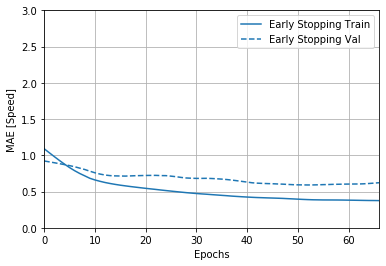

153/153 - 0s - loss: 0.8062 - mean_absolute_error: 0.8062 - mean_squared_error: 0.9182
Testing set Mean Abs Error:  0.81 mph


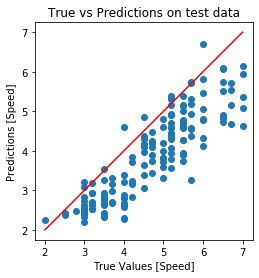

In [57]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

EPOCHS = 2000

model = build_cnn_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

early_history = model.fit(Features_Train, Labels_Train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])




plotter.plot({'Early Stopping': early_history}, metric = "mean_absolute_error")
plt.ylim([0, 3])
plt.ylabel('MAE [Speed]')
plt.show()

%matplotlib inline




loss, mae, mse = model.evaluate(Features_Test, Labels_Test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} mph".format(mae))




test_predictions = model.predict(Features_Test)#.flatten()

a = plt.axes(aspect='equal')
plt.scatter(Labels_Test, test_predictions,)
plt.xlabel('True Values [Speed]')
plt.ylabel('Predictions [Speed]')
lims = [2, 7]
#plt.xlim(lims)
#plt.ylim(lims)
#plt.xticks(np.linspace(2,7,11),rotation = 'vertical')
#plt.yticks(np.linspace(2,7,11))


_ = plt.plot(lims, lims, color= 'red')
plt.title('True vs Predictions on test data')
#plt.savefig('predictions.jpg')
plt.show()
%matplotlib inline